# Analysis of Fandango Rating System

The goal of this project is to verify whether the rating system at Fandango has changed after the article by Hickey. 


We are going to compare raitngs of filmsat Fandango before and after Hickey's analysis. Then we may decide if the rating system at Fandango is more mathematically and statistically correct than before. 

Data description may be find:
- before: https://github.com/fivethirtyeight/data/tree/master/fandango
- after: https://github.com/mircealex/Movie_ratings_2016_17

### Import & data collection

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df_before = pd.read_csv('fandango_score_comparison.csv')
df_after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
df_before.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [4]:
df_after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [5]:
df_before_filter = df_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
df_after_filter = df_after[['movie', 'year', 'fandango']]

Sampling was not random due to different criteria used to collect the two data sets. What is more, data like these are impacted by trends, thus there is no arbitrary unbiasad corect value.

Due to this fact, we will not compare the two data sets as it is but rather compare the differrences between different platform before and after.

# Data filtering

We will take only the popular films chosed by Hickey's benchmark, so only those that have over 30 fan ratings. 

In [6]:
df_after_filter.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [7]:
len(df_before_filter[df_before_filter['Fandango_votes'] > 30])

146

In [8]:
df_after_filter.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Unfortunetelly, Fnadango's website is not available outside United States, thus I cannot verify the ratings. For the sake of exercise I assume that there were more than 30 votes per film in general. 

In [9]:
df_2016 = df_after_filter[df_after_filter['year'] == 2016]
df_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [10]:
df_before_filter['year'] = df_before_filter['FILM'].str[-5:-1]
df_2015 = df_before_filter[df_before_filter['year'] == '2015']
df_before_filter.head(5)

/var/folders/nm/_nrzqcrn7tl7q4j1yjdtc8_c0000gn/T/ipykernel_3368/3169915984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_filter['year'] = df_before_filter['FILM'].str[-5:-1]


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


# Data analysis

Steps to determine whether there's any difference between Fandango's ratings for populat movies in 2015 and Fandango's rating for popular movies in 2016.

In [ ]:
#pip install scipy

In [11]:
from numpy import arange
%matplotlib inline

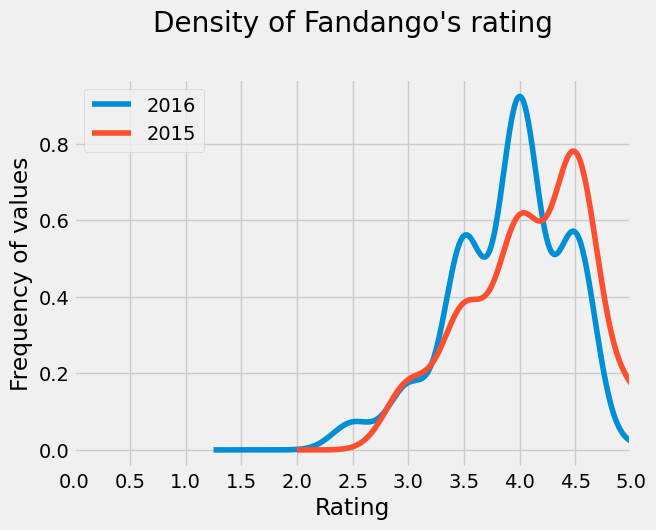

In [12]:
plt.style.use('fivethirtyeight')
df_2016['fandango'].plot.kde(label = '2016', legend = True)
df_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
#plt.axvline(497, label='Average')
plt.title("Density of Fandango's rating", y=1.1)
plt.xlabel('Rating')
plt.ylabel('Frequency of values')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend()
plt.show()

Visualization above suggests that:
- distribution of rating in 2015 is left skewed
- distribution in 2016 is symmetrical in range (3; 5)

The rating in 2016 was a little bit more subdued with minimal rating of 2.5 and the most frequent value was 4.5 in comparison with 2015 where the minimal rating was 3.0 and the most frequent rate was 4.5. 



### Frequency distribution tables

With normalized valus using percentage.

In [13]:
df_2016['fandango'].value_counts(normalize = True).sort_index() * 100

fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

In [14]:
df_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

With distribution tables we can see the defference less clearly as on plot above. However we still observe the significant difference in frequency of ratings, especially when it comes to the highest value which in 2016 was 0.5% and in 2015 it was almost 7%. Also the minimal rating is interesting, because in 2015 there was no film rated under 3.0 and in 2016 the rate of 2.5 reached over 3%.

### Summary statistics

In [15]:
mean_2016 = df_2016['fandango'].mean()
median_2016 = df_2016['fandango'].median()
mode_2016 = df_2016['fandango'].mode()

mean_2015 = df_2015['Fandango_Stars'].mean()
median_2015 = df_2015['Fandango_Stars'].median()
mode_2015 = df_2015['Fandango_Stars'].mode()

print('Mean in 2016',mean_2016, '\nMedian in 2016', median_2016,'\nMode in 2016', mode_2016)
print('\nMean in 2015',mean_2015, '\nMedian in 2015', median_2015,'\nMode in 2015',  mode_2015)

Mean in 2016 3.887434554973822 
Median in 2016 4.0 
Mode in 2016 0    4.0
Name: fandango, dtype: float64

Mean in 2015 4.0852713178294575 
Median in 2015 4.0 
Mode in 2015 0    4.5
Name: Fandango_Stars, dtype: float64


In [16]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015[0]]
summary['2016'] = [mean_2016, median_2016, mode_2016[0]]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


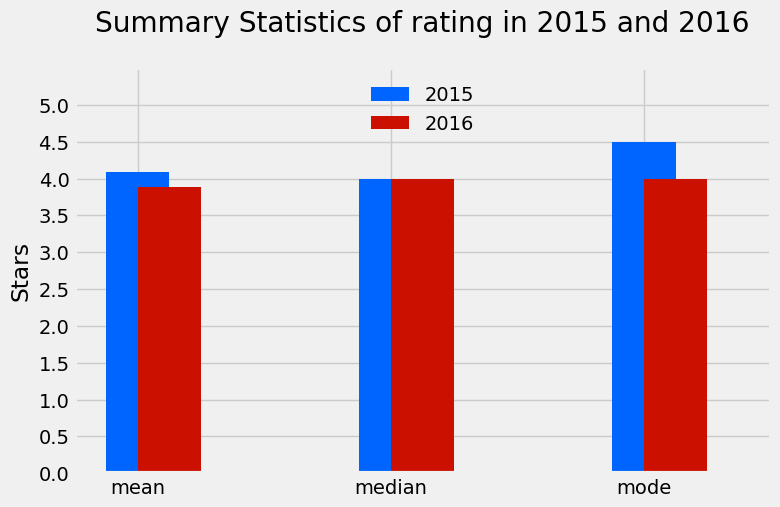

In [20]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0065FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC1000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Summary Statistics of rating in 2015 and 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The two difference that we can observe from this fraph are:
- lower mean value by 0.5 point
- lower most common value by 1 point

### Conclusion

The analysis above determined that there are in fact some differences in rating of popular films on Fandangos website before and after the article of Hickey. On average the films in 2016 where rated lower than in 2015. Whether it was due to change in rating system or trends in movie making industry is yet to be analysied.